**Query문을 중점적으로 봐주시면 됩니다.**

**Python의 경우 1~3번은 R과 동일한 예제와 SQL문을 활용해주세요.**

**기본키 삭제에 따른 외래키의 변화를 확인할 때는 반드시 DB 파일을 먼저 백업해주세요.**

In [100]:
library(DBI)
library(RSQLite)
library(readxl)

conn = dbConnect(SQLite(), "./kocw data/RSQlite/kocw.db")
dbExecute(conn, "PRAGMA foreign_keys = ON")

[1] 0

### 1. 기본키 설정이 맞는지 확인 + 튜플의 수정 및 삭제

`#` 해야 할 일

**설정 확인**

* 기본키가 겹치지 않는 튜플을 넣어서 제대로 들어가는지 확인하고, 기본키가 중복되는 튜플을 넣어서 제대로 돌아가는지 확인합니다.

**수정 및 삭제**

* 기본키가 겹치지 않는 튜플을 넣은 뒤에 그 튜플을 수정한 결과와 삭제한 결과를 같이 보여주시면 됩니다.

`#` 예시

`-` 중복되지 않는 기본키를 가지는 튜플 삽입 시(정상조작)

In [33]:
## professor 중복되지 않는 기본키를 가지는 튜플 삽입 시 정상
dbExecute(conn, "INSERT INTO professor VALUES(-1, '강신성', '자연계열', '전북대학교')")
dbGetQuery(conn, "SELECT * FROM professor LIMIT 5")

## 수정
dbExecute(conn, "UPDATE professor SET 제공대학명 = '조선대학교' WHERE 교수코드 = -1")
dbGetQuery(conn, "SELECT * FROM professor LIMIT 5")

## 삭제
dbExecute(conn, "DELETE FROM professor WHERE 교수코드 = -1")
dbGetQuery(conn, "SELECT * FROM professor LIMIT 5")

[1] 1

교수코드,담당교수명,담당분야,제공대학명
<int>,<chr>,<chr>,<chr>
-1,강신성,자연계열,전북대학교
0,안상욱,자연계열,한경대학교
1,이중호,자연계열,가천대학교
2,최수한,자연계열,단국대학교
3,김문현,자연계열,성균관대학교


[1] 1

교수코드,담당교수명,담당분야,제공대학명
<int>,<chr>,<chr>,<chr>
-1,강신성,자연계열,1조대학교
0,안상욱,자연계열,한경대학교
1,이중호,자연계열,가천대학교
2,최수한,자연계열,단국대학교
3,김문현,자연계열,성균관대학교


[1] 1

교수코드,담당교수명,담당분야,제공대학명
<int>,<chr>,<chr>,<chr>
0,안상욱,자연계열,한경대학교
1,이중호,자연계열,가천대학교
2,최수한,자연계열,단국대학교
3,김문현,자연계열,성균관대학교
4,이상준,자연계열,덕성여자대학교


In [50]:
## university 중복되지 않은 기본키를 가지는 튜플 삽입 시 정상
dbExecute(conn, "INSERT INTO university VALUES('1조대학교', '뉴욕', '사립')")
dbGetQuery(conn, "SELECT * FROM university LIMIT 10 OFFSET 182")
dbExecute(conn, "DELETE FROM university WHERE 제공대학명 = '1조대학교'")

[1] 1

제공대학명,대학소재지,구분
<chr>,<chr>,<chr>
사이버한국외국어대학교,서울특별시,사립
수원대학교,경기도,사립
구미대학교,경상북도,사립
가톨릭관동대학교,강원특별자치도,사립
1조대학교,뉴욕,사립


[1] 1

`-` 중복되는 기본키를 가지는 튜플 삽입 시(비정상 조작)

In [36]:
## 중복되는 기본키를 가지는 튜플 삽입 시 오류 발생 -> 정상적으로 기본키 설정됨
dbExecute(conn, "INSERT INTO professor VALUES(1, '강신성2', '자연계열', '전북대학교')")

ERROR: Error: UNIQUE constraint failed: professor.교수코드


In [46]:
## 중복되는 기본키를 가지는 튜플 삽입 시 오류 발생 -> 정상적으로 기본키 설정됨
dbExecute(conn, "INSERT INTO university VALUES('전북대학교', '뉴욕', '국립')")

ERROR: Error: UNIQUE constraint failed: university.제공대학명


> 위와 유사한 예시를 사용해주세요. Python의 경우 조원에게서 R의 예시를 그대로 넘겨받아 코드를 구성해주세요.

### 2. 기본키 삭제에 따른 외래키의 변화 확인

`#` 해야 할 일

* 기본키를 삭제했을 때, 그것을 참조한 테이블에서의 값이 어떻게 변하는지를 확인합니다.

* 외래키 규칙에 대한 설명이 필요합니다. 이는 R을 맡으신 분께서 진행해주세요.

* 원래의 테이블을 보여주고, 외래키에 해당하는 값을 바꾸거나 삭제한 뒤 다시 원래의 테이블이 어떻게 바뀌는지 보여주세요.

`-` 외래키가 있는 릴레이션의 CASCADE / SET NULL 기준 서술

**기준 서술은 R의 PPT에서 진행해주세요.**

1. 담당교수 릴레이션

   * 소속대학명 `ON UPDATE CASCADE, ON DELETE SET NULL`

   > UPDATE : 소속된 대학의 이름이 바뀌어도 교수가 그 대학에 소속되었다는 사실은 변하지 않음.
   >
   > DELETE : 소속된 대학이 사라져도 교수는 강의를 제공했기 때문에 교수에 대한 정보를 유지하고자 함.

3. 강의 릴레이션

    * 제공대학명 `ON UPDATE CASCADE, ON DELETE SET NULL`
  
   > UPDATE : 제공한 대학의 이름이 바뀌어도 그 대학이 강의를 제공했었다는 사실은 변하지 않음
   >
   > DELETE : 제공한 대학이 사라져도 제공되었던 강의 정보를 유지하고자 함.

    * 강의명 `ON UPDATE CASCADE, ON DELETE CASCADE`
  
    > UPDATE : 기존에 있었던 강의명이 바뀌어도 다른 속성값들은 그대로임.
    >
    > DELETE : 강의명을 없앤다는 것 자체의 의도가 해당 강의를 없애고 싶다는 의미이므로 같이 삭제하는 게 합리적.

3. 담당 릴레이션

    * 교수코드 및 강의코드 `ON UPDATE CASCADE, ON DELETE CASCADE`
  
   > UPDATE : 교수코드 및 강의코드가 수정되어도 매핑 정보를 유지해줘야 함.
   >
   > DELETE : 삭제했을 시 남겨둬야 할 정보가 없음 & 기본키에 NULL이 존재하면 개체 무결성 제약 깨짐

`#` 예시

구성 순서 : 바꾸기 전 원래의 테이블 보여주기 -> 내용 바꾸거나 수정하기 -> 수정 후 참조한 외래키가 있는 테이블 보여주기

**제공대학명의 기본키**

`-` 원래의 테이블 값 보여주기

In [15]:
dbGetQuery(conn, "SELECT * FROM professor WHERE 제공대학명 = '전북대학교' LIMIT 5")

교수코드,담당교수명,담당분야,제공대학명
<int>,<chr>,<chr>,<chr>
9,마인숙,자연계열,전북대학교
103,곽지이,자연계열,전북대학교
104,이선영,자연계열,전북대학교
105,정수미,자연계열,전북대학교
106,최일선,자연계열,전북대학교


In [16]:
dbGetQuery(conn, "SELECT * FROM norm_course WHERE 제공대학명 = '전북대학교' LIMIT 5")

강의코드,강의명,강의년도,강의학기,제공일자,제공대학명
<int>,<chr>,<int>,<int>,<chr>,<chr>
133761,자바 프로그래밍,2009,1,2008-12-11,전북대학교
145685,조경수 관리,2009,1,2009-11-05,전북대학교
153670,전력전자 및 실험,2009,2,2010-04-28,전북대학교
156266,기능생리학 1,2009,1,2010-06-10,전북대학교
156446,BIN융합개론및세미나 1,2009,1,2010-06-11,전북대학교


In [17]:
dbGetQuery(conn, "SELECT * FROM university WHERE 제공대학명 = '전북대학교'")

제공대학명,대학소재지,구분
<chr>,<chr>,<chr>
전북대학교,전라북도,국립


`-` 내용 바꾸기

In [19]:
dbExecute(conn, "UPDATE university SET 제공대학명 = '전북특별자치대학교' WHERE 제공대학명 = '전북대학교'")
dbGetQuery(conn, "SELECT * FROM university WHERE 제공대학명 = '전북특별자치대학교'")
dbGetQuery(conn, "SELECT * FROM norm_course WHERE 제공대학명 = '전북특별자치대학교' LIMIT 5")
dbExecute(conn, "UPDATE university SET 제공대학명 = '전북대학교' WHERE 제공대학명 = '전북특별자치대학교'")
## 다시 원래대로 돌려놓은 겁니다.

[1] 201

제공대학명,대학소재지,구분
<chr>,<chr>,<chr>
전북특별자치대학교,전라북도,국립


강의코드,강의명,강의년도,강의학기,제공일자,제공대학명
<int>,<chr>,<int>,<int>,<chr>,<chr>
133761,자바 프로그래밍,2009,1,2008-12-11,전북특별자치대학교
145685,조경수 관리,2009,1,2009-11-05,전북특별자치대학교
153670,전력전자 및 실험,2009,2,2010-04-28,전북특별자치대학교
156266,기능생리학 1,2009,1,2010-06-10,전북특별자치대학교
156446,BIN융합개론및세미나 1,2009,1,2010-06-11,전북특별자치대학교


[1] 201

`-` 기본키 삭제하기(`SET NULL`의 경우 : 전북대학교 없애보기)

In [22]:
dbExecute(conn, "DELETE FROM university WHERE 제공대학명 = '전북대학교'")
dbGetQuery(conn, "SELECT * FROM university WHERE 제공대학명 = '전북대학교'")
dbGetQuery(conn, "SELECT * FROM norm_course WHERE 제공대학명 = NULL LIMIT 5")

[1] 201

제공대학명,대학소재지,구분
<chr>,<chr>,<chr>


강의코드,강의명,강의년도,강의학기,제공일자,제공대학명
<int>,<chr>,<int>,<int>,<dbl>,<chr>


In [25]:
dbGetQuery(conn, "SELECT * FROM norm_course WHERE 제공대학명 IS NULL LIMIT 5")

강의코드,강의명,강의년도,강의학기,제공일자,제공대학명
<int>,<chr>,<int>,<int>,<chr>,<chr>
133761,자바 프로그래밍,2009,1,2008-12-11,NA
145685,조경수 관리,2009,1,2009-11-05,NA
153670,전력전자 및 실험,2009,2,2010-04-28,NA
156266,기능생리학 1,2009,1,2010-06-10,NA
156446,BIN융합개론및세미나 1,2009,1,2010-06-11,NA


In [26]:
dbGetQuery(conn, "SELECT * FROM professor WHERE 제공대학명 IS NULL LIMIT 5")

교수코드,담당교수명,담당분야,제공대학명
<int>,<chr>,<chr>,<chr>
9,마인숙,자연계열,NA
103,곽지이,자연계열,NA
104,이선영,자연계열,NA
105,정수미,자연계열,NA
106,최일선,자연계열,NA


**강의교육분류의 기본키**

`-` 기본키 삭제하기 2(`CASCADE`의 경우 : 수학1 없애기)

In [31]:
dbGetQuery(conn, "SELECT * FROM course_classed LIMIT 5")

강의명,교육분류
<chr>,<chr>
대학수학1,수학ㆍ물리ㆍ천문ㆍ지리
수학1,수학ㆍ물리ㆍ천문ㆍ지리
미적분학,수학ㆍ물리ㆍ천문ㆍ지리
공학수학1,수학ㆍ물리ㆍ천문ㆍ지리
정수론,수학ㆍ물리ㆍ천문ㆍ지리


In [33]:
dbGetQuery(conn, "SELECT * FROM norm_course WHERE 강의명 = '수학1'")

강의코드,강의명,강의년도,강의학기,제공일자,제공대학명
<int>,<chr>,<int>,<int>,<chr>,<chr>
1104074,수학1,2015,1,2015-09-14,가천대학교
1145182,수학1,2015,1,2010-09-09,아주대학교
1171850,수학1,2016,1,2016-07-20,원광대학교


In [34]:
dbExecute(conn, "DELETE FROM norm_course WHERE 강의명 = '수학1'")

[1] 6

In [35]:
dbGetQuery(conn, "SELECT * FROM norm_course WHERE 강의명 = '수학1'")

강의코드,강의명,강의년도,강의학기,제공일자,제공대학명
<int>,<chr>,<int>,<int>,<dbl>,<chr>


> 튜플이 전부 제거되어 ON DELETE CASCADE인 것을 확인 가능

모든 외래키에 대해서 설명할 수 있으면 가장 좋고, 그렇지 않다면 NULL과 CASCADE로 설정된 것들 각각만이라도 설명하고 다른 것들도 이렇게 되어있다고 해주세요.

아래를 같이 보여주며 설명하는 것도 좋습니다.(각 테이블의 스키마 정보)

In [36]:
dbGetQuery(conn, "SELECT * FROM sqlite_schema")

type,name,tbl_name,rootpage,sql
<chr>,<chr>,<chr>,<int>,<chr>
table,university,university,2,"CREATE TABLE university ( 제공대학명 TEXT PRIMARY KEY, 대학소재지 TEXT, 구분 TEXT )"
index,sqlite_autoindex_university_1,university,3,NA
table,norm_course,norm_course,4,"CREATE TABLE norm_course ( 강의코드 INTEGER PRIMARY KEY, 강의명 TEXT, 강의년도 INTEGER, 강의학기 INTEGER, 제공일자 DATE, 제공대학명 TEXT, FOREIGN KEY (제공대학명) REFERENCES university(제공대학명) ON UPDATE CASCADE ON DELETE SET NUll )"
table,professor,professor,5,"CREATE TABLE professor ( 교수코드 INTEGER PRIMARY KEY, 담당교수명 TEXT, 담당분야 TEXT, 제공대학명 TEXT, FOREIGN KEY (제공대학명) REFERENCES university(제공대학명) ON UPDATE CASCADE ON DELETE SET NUll )"
table,charge,charge,6,"CREATE TABLE charge ( 교수코드 INTEGER, 강의코드 INTEGER, FOREIGN KEY (교수코드) REFERENCES professor(교수코드) ON UPDATE CASCADE ON DELETE CASCADE FOREIGN KEY (강의코드) REFERENCES norm_course(강의코드) ON UPDATE CASCADE ON DELETE CASCADE PRIMARY KEY (교수코드, 강의코드) )"
index,sqlite_autoindex_charge_1,charge,7,NA
table,course_classed,course_classed,8,"CREATE TABLE course_classed ( 강의명 TEXT PRIMARY KEY, 교육분류 TEXT )"
index,sqlite_autoindex_course_classed_1,course_classed,9,NA


### 3. 조인 조작의 정상성 여부 확인

`#` 해야할 일

**조인으로 분리 전 테이블 만들어보기**

* SQL 구문을 통해 쪼개기 전 테이블을 단계에 걸쳐 재구성해봅니다.

* 모든 개체가 참여하며, 완전종속이고, NULL값이 없기 때문에 내부조인만으로도 가능합니다.

* 2번을 수행하신 뒤라면 백업한 DB파일을 재로드하신 뒤 아래 과정을 수행하셔아 합니다. 그렇지 않으면 NA값이 생겨요.

`-` 제공대학명을 기준으로 교수와 제공대학을 내부 조인

In [103]:
dbGetQuery(conn, "SELECT * FROM norm_course LIMIT 6")

강의코드,강의명,강의년도,강의학기,제공일자,제공대학명
<int>,<chr>,<int>,<int>,<chr>,<chr>
127521,윤리학 개론,2009,1,2009-03-12,연세대학교
127676,발명과 특허,2009,1,2009-04-30,부경대학교
128045,연구방법론,2009,1,2015-08-30,삼육대학교
128322,사회복지 개론,2009,1,2009-06-30,을지대학교
128348,부부 이마고 치료,2009,1,2022-09-28,수도국제대학원대학교
128362,레크리에이션 지도,2009,1,2009-06-30,공주대학교


In [104]:
dbGetQuery(conn, "SELECT * FROM university LIMIT 6")

제공대학명,대학소재지,구분
<chr>,<chr>,<chr>
한경대학교,경기도,국립
가천대학교,경기도,사립
단국대학교,경기도,사립
성균관대학교,서울특별시,사립
덕성여자대학교,서울특별시,사립
과학기술연합대학원대학교,대전광역시,국립


In [129]:
dbGetQuery(conn, "SELECT 교수코드, 담당교수명, 담당분야, university.제공대학명 AS 제공대학명, 대학소재지, 구분
           FROM university INNER JOIN professor ON university.제공대학명 = professor.제공대학명 LIMIT 6")

교수코드,담당교수명,담당분야,제공대학명,대학소재지,구분
<int>,<chr>,<chr>,<chr>,<chr>,<chr>
0,안상욱,자연계열,한경대학교,경기도,국립
1,이중호,자연계열,가천대학교,경기도,사립
2,최수한,자연계열,단국대학교,경기도,사립
3,김문현,자연계열,성균관대학교,서울특별시,사립
4,이상준,자연계열,덕성여자대학교,서울특별시,사립
5,나성호,자연계열,과학기술연합대학원대학교,대전광역시,국립


`-` 위 테이블과 담당을 조인

In [106]:
dbGetQuery(conn, "SELECT * FROM charge LIMIT 6")

교수코드,강의코드
<int>,<int>
0,1095582
1,1104074
2,1110603
3,1112400
4,1118072
4,1118158


In [130]:
dbGetQuery(conn, "SELECT 강의코드,
           professor.교수코드 AS 교수코드, 담당교수명, 담당분야,
           university.제공대학명 AS 제공대학명, 대학소재지, 구분
           FROM university INNER JOIN professor ON university.제공대학명 = professor.제공대학명
           INNER JOIN charge ON professor.교수코드 = charge.교수코드 LIMIT 6")

강의코드,교수코드,담당교수명,담당분야,제공대학명,대학소재지,구분
<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1095582,0,안상욱,자연계열,한경대학교,경기도,국립
1104074,1,이중호,자연계열,가천대학교,경기도,사립
1110603,2,최수한,자연계열,단국대학교,경기도,사립
1112400,3,김문현,자연계열,성균관대학교,서울특별시,사립
1118072,4,이상준,자연계열,덕성여자대학교,서울특별시,사립
1118158,4,이상준,자연계열,덕성여자대학교,서울특별시,사립


`-` 위 테이블과 강의를 조인

In [112]:
dbGetQuery(conn, "SELECT * FROM norm_course LIMIT 6")

강의코드,강의명,강의년도,강의학기,제공일자,제공대학명
<int>,<chr>,<int>,<int>,<chr>,<chr>
127521,윤리학 개론,2009,1,2009-03-12,연세대학교
127676,발명과 특허,2009,1,2009-04-30,부경대학교
128045,연구방법론,2009,1,2015-08-30,삼육대학교
128322,사회복지 개론,2009,1,2009-06-30,을지대학교
128348,부부 이마고 치료,2009,1,2022-09-28,수도국제대학원대학교
128362,레크리에이션 지도,2009,1,2009-06-30,공주대학교


In [136]:
dbGetQuery(conn, "SELECT norm_course.강의코드 AS 강의코드, 강의명, 강의년도, 강의학기, 제공일자,
           professor.교수코드 AS 교수코드, 담당교수명, 담당분야,
           university.제공대학명 AS 제공대학명, 대학소재지, 구분
           FROM university INNER JOIN professor ON university.제공대학명 = professor.제공대학명
           INNER JOIN charge ON professor.교수코드 = charge.교수코드
           INNER JOIN norm_course ON charge.강의코드 = norm_course.강의코드 LIMIT 6")

강의코드,강의명,강의년도,강의학기,제공일자,교수코드,담당교수명,담당분야,제공대학명,대학소재지,구분
<int>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1095582,대학수학1,2015,1,2015-08-30,0,안상욱,자연계열,한경대학교,경기도,국립
1104074,수학1,2015,1,2015-09-14,1,이중호,자연계열,가천대학교,경기도,사립
1110603,미적분학,2015,1,2015-10-08,2,최수한,자연계열,단국대학교,경기도,사립
1112400,공학수학1,2015,1,2015-11-02,3,김문현,자연계열,성균관대학교,서울특별시,사립
1118072,정수론,2015,2,2015-12-16,4,이상준,자연계열,덕성여자대학교,서울특별시,사립
1118158,확률론,2015,2,2015-12-16,4,이상준,자연계열,덕성여자대학교,서울특별시,사립


`-` 위 테이블과 강의교육분류를 내부 조인

In [117]:
dbGetQuery(conn, "SELECT * FROM course_classed LIMIT 6")

강의명,교육분류
<chr>,<chr>
대학수학1,수학ㆍ물리ㆍ천문ㆍ지리
수학1,수학ㆍ물리ㆍ천문ㆍ지리
미적분학,수학ㆍ물리ㆍ천문ㆍ지리
공학수학1,수학ㆍ물리ㆍ천문ㆍ지리
정수론,수학ㆍ물리ㆍ천문ㆍ지리
확률론,수학ㆍ물리ㆍ천문ㆍ지리


In [138]:
dbGetQuery(conn, "SELECT norm_course.강의코드 AS 강의코드, 강의년도, 강의학기, 제공일자,
           course_classed.강의명 AS 강의명, 교육분류,
           professor.교수코드 AS 교수코드, 담당교수명, 담당분야,
           university.제공대학명 AS 제공대학명, 대학소재지, 구분
           FROM university INNER JOIN professor ON university.제공대학명 = professor.제공대학명
           INNER JOIN charge ON professor.교수코드 = charge.교수코드
           INNER JOIN norm_course ON charge.강의코드 = norm_course.강의코드
           INNER JOIN course_classed ON norm_course.강의명 = course_classed.강의명 LIMIT 6")

강의코드,강의년도,강의학기,제공일자,강의명,교육분류,교수코드,담당교수명,담당분야,제공대학명,대학소재지,구분
<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1095582,2015,1,2015-08-30,대학수학1,수학ㆍ물리ㆍ천문ㆍ지리,0,안상욱,자연계열,한경대학교,경기도,국립
1104074,2015,1,2015-09-14,수학1,수학ㆍ물리ㆍ천문ㆍ지리,1,이중호,자연계열,가천대학교,경기도,사립
1110603,2015,1,2015-10-08,미적분학,수학ㆍ물리ㆍ천문ㆍ지리,2,최수한,자연계열,단국대학교,경기도,사립
1112400,2015,1,2015-11-02,공학수학1,수학ㆍ물리ㆍ천문ㆍ지리,3,김문현,자연계열,성균관대학교,서울특별시,사립
1118072,2015,2,2015-12-16,정수론,수학ㆍ물리ㆍ천문ㆍ지리,4,이상준,자연계열,덕성여자대학교,서울특별시,사립
1118158,2015,2,2015-12-16,확률론,수학ㆍ물리ㆍ천문ㆍ지리,4,이상준,자연계열,덕성여자대학교,서울특별시,사립


이건 해당 과정을 그대로 사용하시면 될 것 같습니다.

### 4. 정보추출을 위한 주요 변수 및 목표 서술

`#` 해야 할 일

**변수 설명과 그걸로 뭘 할 것인지**

* (코드 X) 필요한 변수들과 앞으로 이 변수들을 어떻게 활용할 지 설명해야 합니다.

`-` 정보추출을 위한 주요 변수의 목록

* 대학소재지
* 대학구분
* 강의년도
* 강의학기

`-` 목표

* 지역, 대학구분에 따라 제공되는 강의 수의 차이를 파악 (R)

* 시간의 흐름에 따라 제공되는 강의 수가 어떻게 바뀌는지 파악 (Python)

---

## R을 통한 정보 추출

`#` 해야 할 일

* SQL의 조인과 GROUP BY, COUNT를 이용하여 지역 및 대학구분 별 강의 수를 테이블로 나타냄.
* 이를 데이터프레임으로 저장하여 간단한 시각화(막대그래프 등 원하는 개형으로)

`-` 지역 별 강의 수

1. 강의와 제공대학 테이블을 조인하고, 강의코드를 대학소재지별로 그룹화하여 COUNT -> 빈도 수가 나옴

In [158]:
dbGetQuery(conn, "SELECT count(강의코드) AS 강의수, 대학소재지
           FROM norm_course INNER JOIN university ON norm_course.제공대학명 = university.제공대학명
           GROUP BY 대학소재지 ORDER BY 강의수 DESC")

강의수,대학소재지
<int>,<chr>
5755,서울특별시
2934,경기도
1577,부산광역시
1175,경상북도
859,전라북도
762,충청남도
757,대전광역시
634,울산광역시
564,충청북도


2. 해당 데이터프레임을 기반으로 시각화

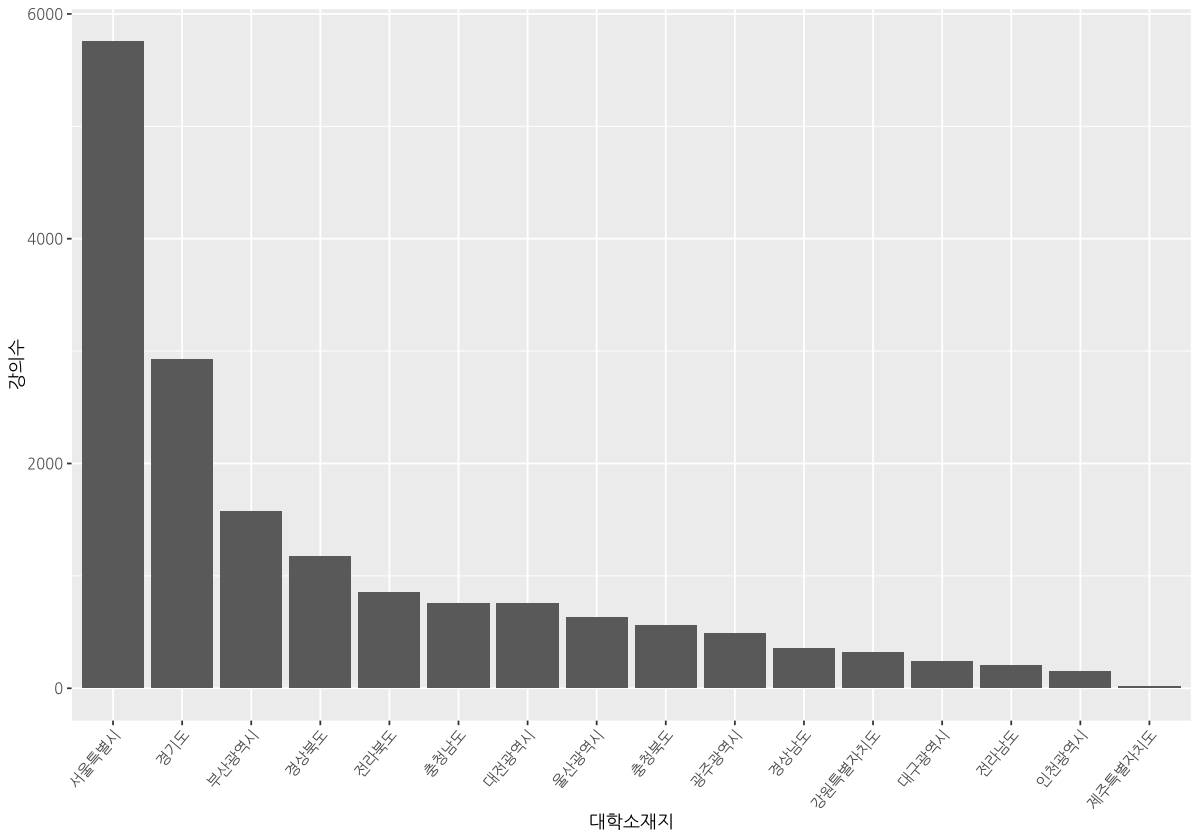

In [180]:
df_domain = dbGetQuery(conn, "SELECT count(강의코드) AS 강의수, 대학소재지
           FROM norm_course INNER JOIN university ON norm_course.제공대학명 = university.제공대학명
           GROUP BY 대학소재지 ORDER BY 강의수 DESC")

library(ggplot2)
options(repr.plot.width = 10)
df_domain$대학소재지 = factor(df_domain$대학소재지, levels = as.array(df_domain$대학소재지))

ggplot(df_domain, aes(대학소재지, 강의수)) +
    geom_bar(stat = 'identity') +
    theme(axis.text.x=element_text(angle=50, hjust=1))

`-` 대학구분 별 강의 수

In [181]:
dbGetQuery(conn, "SELECT count(강의코드) AS 강의수, 구분
           FROM norm_course INNER JOIN university ON norm_course.제공대학명 = university.제공대학명
           GROUP BY 구분 ORDER BY 강의수 DESC")

강의수,구분
<int>,<chr>
14264,사립
2550,국립


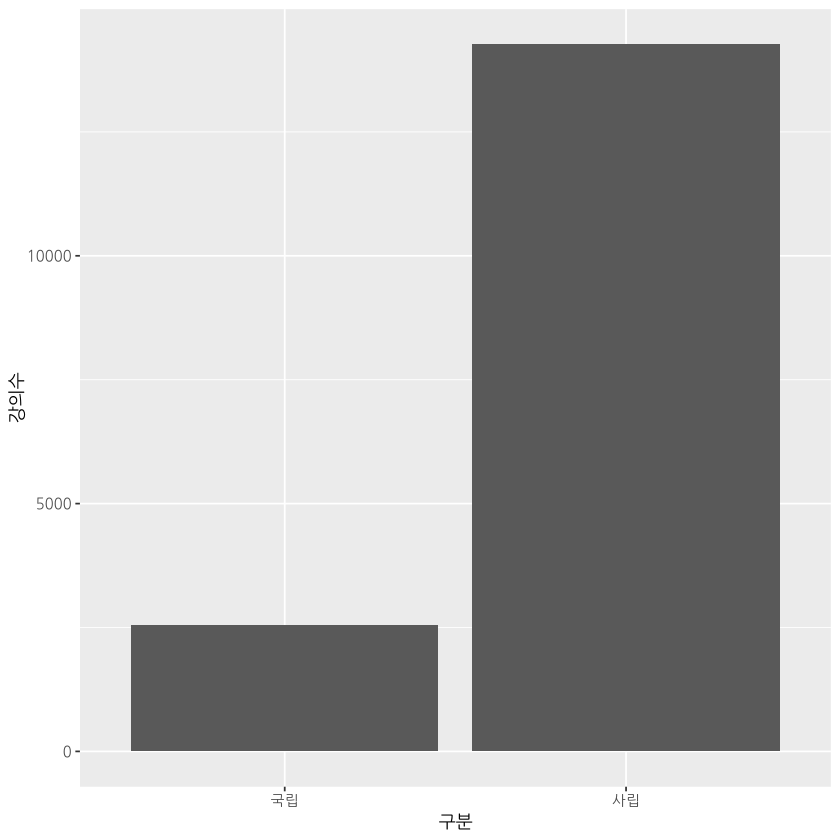

In [185]:
df_domain = dbGetQuery(conn, "SELECT count(강의코드) AS 강의수, 구분
           FROM norm_course INNER JOIN university ON norm_course.제공대학명 = university.제공대학명
           GROUP BY 구분 ORDER BY 강의수 DESC")

library(ggplot2)
options(repr.plot.width = 7)

ggplot(df_domain, aes(구분, 강의수)) +
    geom_bar(stat = 'identity')

> 하다보니까 다 해놓은 것 같네요. 그래프 파라메터는 알아서 조정해주세요. 추가해야 할 내용 있으면 추가해주세요.

---

## Python을 통한 정보 추출

`#` 해야 할 일

* SQL의 조인과 GROUP BY, COUNT 등을 이용하여 시간에 따른 강의 수의 변화를 테이블로 나타냄
* 이를 데이터프레임으로 저장하여 이상치를 제외한 구간 별 회귀분석을 진행하고, 왜 이러한 결과가 나오는 지 설명.

### Imports and DB file

In [1]:
import pandas as pd
import sqlite3

In [2]:
con = sqlite3.connect(':memory:')
con = sqlite3.connect('./kocw data/sqlite3/kocw.db')
cur = con.cursor()

`-` 시간 별 강의 수

1. 강의 테이블을 강의학기와 강의년도 둘의 튜플 조합 별로 그룹화하여 COUNT

In [3]:
cur.execute("SELECT * FROM norm_course LIMIT 6")
cur.fetchall()

[(127521, '윤리학 개론', 2009, 1, '연세대학교', '2009-03-12'),
 (127676, '발명과 특허', 2009, 1, '부경대학교', '2009-04-30'),
 (128045, '연구방법론', 2009, 1, '삼육대학교', '2015-08-30'),
 (128322, '사회복지 개론', 2009, 1, '을지대학교', '2009-06-30'),
 (128348, '부부 이마고 치료', 2009, 1, '수도국제대학원대학교', '2022-09-28'),
 (128362, '레크리에이션 지도', 2009, 1, '공주대학교', '2009-06-30')]

In [4]:
cur.execute("""SELECT COUNT(*) AS 강의수, 강의년도, 강의학기
               FROM norm_course GROUP BY 강의년도, 강의학기
""")

cur.fetchall()

[(1, 2007, 1),
 (1414, 2009, 1),
 (85, 2009, 2),
 (179, 2010, 1),
 (205, 2010, 2),
 (431, 2011, 1),
 (466, 2011, 2),
 (714, 2012, 1),
 (724, 2012, 2),
 (771, 2013, 1),
 (769, 2013, 2),
 (777, 2014, 1),
 (951, 2014, 2),
 (799, 2015, 1),
 (975, 2015, 2),
 (718, 2016, 1),
 (801, 2016, 2),
 (621, 2017, 1),
 (861, 2017, 2),
 (469, 2018, 1),
 (576, 2018, 2),
 (466, 2019, 1),
 (641, 2019, 2),
 (378, 2020, 1),
 (635, 2020, 2),
 (666, 2021, 1),
 (480, 2021, 2),
 (213, 2022, 1),
 (28, 2022, 2)]

`-` 데이터프레임 구성 후 두 열의 정보를 연결하여 시계열 자료로 구성

In [5]:
cur.execute("""SELECT COUNT(*) AS 강의수, 강의년도, 강의학기
               FROM norm_course GROUP BY 강의년도, 강의학기
""")

df_time = pd.DataFrame(cur.fetchall()).rename({0 : "강의수", 1 : "강의년도", 2 : "강의학기"}, axis = 1)
df_time

,강의수,강의년도,강의학기
0,1,2007,1
1,1414,2009,1
2,85,2009,2
3,179,2010,1
4,205,2010,2
5,431,2011,1
6,466,2011,2
7,714,2012,1
8,724,2012,2
9,771,2013,1


`-` 분석 및 시각화

In [6]:
import sklearn.linear_model
import plotly.io as pio  ## matplotlib이나 seaborn으로 하셔도 됩니다.
import plotly.graph_objects as go

In [114]:
pd.options.plotting.backend = 'plotly'
pio.templates.default = 'plotly_white'
# pio.renderers.default = "notebook"
pio.renderers.default = "colab"

In [7]:
## 해당 코드는 발표 시 블락처리하고, 그냥 아래 데이터프레임처럼 만들었다고 해주세요.
featured_df = df_time.assign(강의학기 = lambda _df : _df.강의학기.map(lambda x : '-01-01' if x == 1 else '-07-01'))\
.assign(강의년도 = lambda _df : _df.astype('str').강의년도).assign(강의년도 = lambda _df : _df.강의년도 + _df.강의학기)\
.drop('강의학기', axis = 1).assign(강의년도 = lambda _df : pd.to_datetime(_df.강의년도))

featured_df

,강의수,강의년도
0,1,2007-01-01
1,1414,2009-01-01
2,85,2009-07-01
3,179,2010-01-01
4,205,2010-07-01
5,431,2011-01-01
6,466,2011-07-01
7,714,2012-01-01
8,724,2012-07-01
9,771,2013-01-01


In [116]:
featured_df.plot.line(x = "강의년도", y = "강의수")

`-` 구간 별 회귀분석

https://namu.wiki/w/K-MOOC

상단 링크의 해당 표를 이용하여 해석해주세요.(운영개시일) 첫 이상치는 운영 개시 후 사실상 첫 시기라 많았다고 해석하시면 됩니다.

2015-2학기의 값과 해당 정보를 기반으로 말씀해주세요.

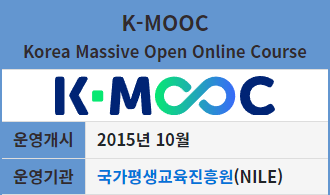

In [8]:
## 1. data
X = pd.DataFrame({'강의년도' : list(featured_df.drop(1).index)}).assign(구간 = lambda _df : _df.강의년도.map(lambda x : 0 if x <= 14 else x - 14))
X.iloc[0, 0] = -3
y = featured_df.drop(1).강의수

## 2. predictor
predictr = sklearn.linear_model.LinearRegression()

## 3. fitting
predictr.fit(X, y)

## 4. prediction
yhat = predictr.predict(X)
yhat_matrix = pd.DataFrame({'yhat' : yhat}, index = y.index).reset_index().rename({"yhat" : "강의수"}, axis = 1)\
.merge(featured_df.강의년도.reset_index()).drop("index", axis = 1)

In [165]:
fig = featured_df.plot.line(x = "강의년도", y = "강의수")
fig.add_trace(go.Scatter(x = yhat_matrix.강의년도, y = yhat_matrix.강의수))

fig.show()

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

In [11]:
rc('font', family='NanumBarunGothic')

plt.rcParams['axes.unicode_minus'] = False

In [13]:
yhat_matrix

,강의수,강의년도
0,-56.181910,2007-01-01
1,234.537627,2009-07-01
2,292.681535,2010-01-01
3,350.825442,2010-07-01
4,408.969350,2011-01-01
5,467.113257,2011-07-01
6,525.257165,2012-01-01
7,583.401072,2012-07-01
8,641.544980,2013-01-01
9,699.688887,2013-07-01


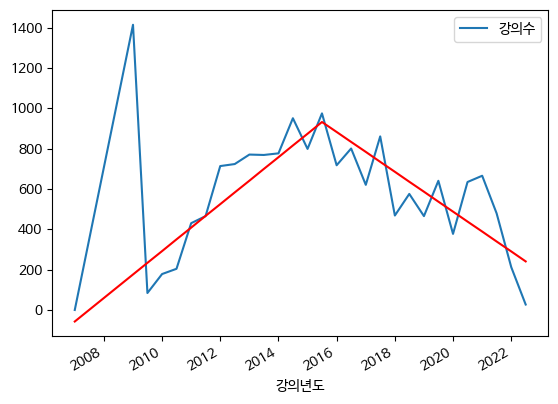

In [12]:
fig, ax = plt.subplots()
featured_df.plot.line(x="강의년도", y="강의수", ax=ax)

ax.plot(yhat_matrix.강의년도, yhat_matrix.강의수, linestyle='-', color='r')

plt.show()